## LOAN PREDICTION

#### This project is about the development of a machine learning model to predict loan approvals for JKM Bank to assist in identifying potential loan customers from their existing applicants data.


#### The datset is downloaded from Kaggle.This dataset contains information about loan applicants for an imaginary bank called JKM, such as income, age,credit card average etc

#### Problem statement
Develop a machine learning model to predict whether a loan application will be 
approved or not, based  on the applicant's details.

#### BENEFITS OF THIS MODEL
1. The bank can focus its advertising on those who most likely to take loan
2. With the model's help,the bank can potentially speed up the loan application process for good customers.

In [23]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

In [24]:
#import the dataset
data=pd.read_excel("Bank_Personal_Loan.xlsx",sheet_name=1)

In [25]:
#Exploring data
data.shape

(5000, 14)

In [26]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [27]:
data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [28]:
#Data types
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [29]:
#dropping unwanted columns
data.drop(columns=['ID', 'ZIP Code'], inplace=True)

In [30]:
#Data formatting
data.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [31]:
#checking duplicates
data.duplicated().sum()

13

In [32]:
#deleting duplicates
data.drop_duplicates(inplace=True)

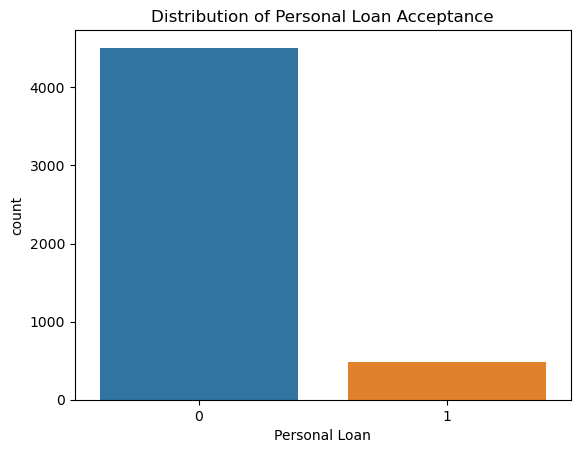

In [33]:
#Distribution of personal loan acceptance
sns.countplot(x='Personal Loan', data=data)
plt.title('Distribution of Personal Loan Acceptance')
plt.show()

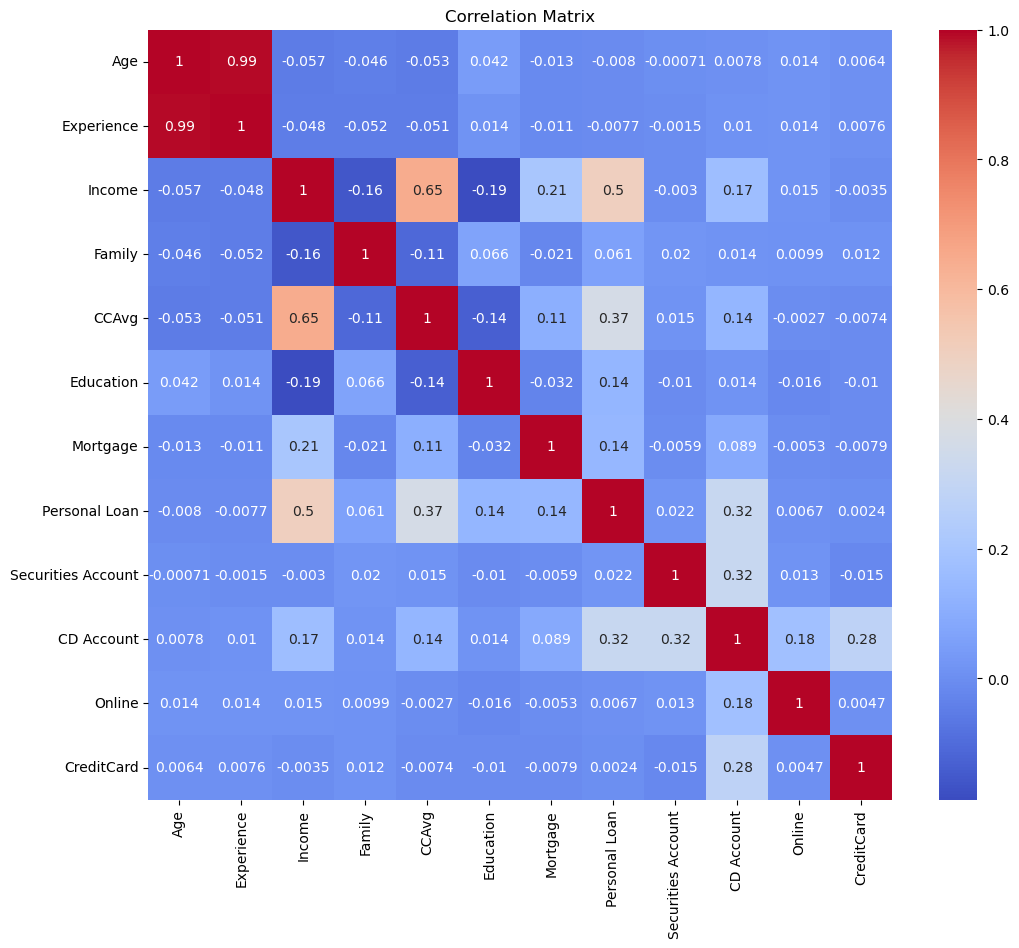

In [34]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [35]:
#feature and target variable
X=data.drop(columns=['Personal Loan'])
y=data['Personal Loan']

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\ishwa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [39]:
#Calculating accuracy,precision,recall and f1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9438877755511023
Precision: 0.7567567567567568
Recall: 0.5957446808510638
F1-score: 0.6666666666666666


#### Conclusion
We used a Logistic Regression model to classify loan applications as approved or rejected. The model achieved an accuracy of 0.944 on the test set, indicating a good ability to correctly classify a large proportion of applications.